In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, adjusted_rand_score, silhouette_score, accuracy_score,
    ConfusionMatrixDisplay, roc_curve, auc, precision_score, recall_score, 
    f1_score, davies_bouldin_score, calinski_harabasz_score,
    homogeneity_score, completeness_score, v_measure_score
)
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
import umap.umap_ as umap
from scipy.stats import mode

# BioInformatica #2

## Data Spliting

In [5]:
df_X = pd.read_csv('X_gexp.csv', index_col=0)
df_Y = pd.read_csv('y_gexp.csv', index_col=0)
df_X.head()

,FSTL1,ELMO2,CREB3L1,PNMA1,MMP2,SMARCD3,PKNOX2,RALYL,ZHX3,APBB2,...,ST18,PSMB9,ProSAPiP1,HCLS1,MMP9,KIAA0802,DHRS2,SGEF,PIK3IP1,CTSC
TCGA-02-0001-01,2.275179,1.873549,1.772059,2.144198,2.269443,1.742389,1.797055,1.677848,1.801352,1.786488,...,1.669895,2.346811,2.004333,2.213310,2.407606,2.083333,2.098461,1.680092,1.953595,2.429578
TCGA-02-0004-01,2.569520,2.085888,1.961846,2.315705,2.505400,2.226593,1.798769,1.671170,2.000942,2.089285,...,1.516024,2.339930,2.045828,2.285701,2.633632,1.938474,1.614437,1.760419,2.010156,2.431814
TCGA-02-0009-01,2.471492,2.030865,1.845808,2.072279,2.346815,1.783762,1.707150,1.599492,1.823480,1.778307,...,1.527561,2.302006,2.059862,2.130193,2.349831,1.815239,1.857933,1.675823,2.011970,2.434026
TCGA-02-0015-01,2.464403,2.094165,1.762169,2.374129,2.213562,2.209426,1.925440,1.936043,2.003743,2.024847,...,1.611626,2.208924,2.050555,2.213955,1.982603,2.125508,1.631955,1.881003,1.886280,2.450704
TCGA-02-0016-01,2.365457,2.188070,1.763206,2.340024,2.219210,2.308335,1.801007,1.756726,2.115714,2.086733,...,1.570489,2.187420,2.265522,2.192262,1.796491,1.979615,1.637215,2.182186,1.897957,2.140727


In [6]:
df_X.shape

(302, 5000)

In [7]:
df_X.isna().sum()

FSTL1       0
ELMO2       0
CREB3L1     0
PNMA1       0
MMP2        0
           ..
KIAA0802    0
DHRS2       0
SGEF        0
PIK3IP1     0
CTSC        0
Length: 5000, dtype: int64

In [8]:
df_Y.shape

(302, 1)

## Data Pre Processing

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_X)

## Unsupervised Learning

Dimensionality reduction techniques (PCA and UMAP).

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

c:\Users\marta\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Clustering algorithms (K-means and Agglomerative Clustering)

In [11]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


c:\Users\marta\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\marta\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\marta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [12]:
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_scaled)

Evaluation metrics

In [15]:
y = df_Y.squeeze()

In [16]:
def evaluate_clustering(X_data, y_true, cluster_labels):
    ari = adjusted_rand_score(y_true, cluster_labels)
    sil = silhouette_score(X_data, cluster_labels)
    dbi = davies_bouldin_score(X_data, cluster_labels)
    chi = calinski_harabasz_score(X_data, cluster_labels)
    hom = homogeneity_score(y_true, cluster_labels)
    comp = completeness_score(y_true, cluster_labels)
    v_meas = v_measure_score(y_true, cluster_labels)

    print(f"Adjusted Rand Index:      {ari:.3f}")
    print(f"Silhouette Score:         {sil:.3f}")
    print(f"Davies-Bouldin Index:     {dbi:.3f}")
    print(f"Calinski-Harabasz Index:  {chi:.3f}")
    print(f"Homogeneity:              {hom:.3f}")
    print(f"Completeness:             {comp:.3f}")
    print(f"V-Measure:                {v_meas:.3f}")

# Example for KMeans
print("KMeans Clustering Evaluation")
evaluate_clustering(X_scaled, y, kmeans_labels)

# Example for Agglomerative
print("\nAgglomerative Clustering Evaluation")
evaluate_clustering(X_scaled, y, agg_labels)


KMeans Clustering Evaluation
Adjusted Rand Index:      0.045
Silhouette Score:         0.106
Davies-Bouldin Index:     2.547
Calinski-Harabasz Index:  42.381
Homogeneity:              0.034
Completeness:             0.034
V-Measure:                0.034

Agglomerative Clustering Evaluation
Adjusted Rand Index:      0.002
Silhouette Score:         0.099
Davies-Bouldin Index:     2.345
Calinski-Harabasz Index:  39.350
Homogeneity:              0.003
Completeness:             0.003
V-Measure:                0.003


In [17]:
results = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'UMAP1': X_umap[:, 0],
    'UMAP2': X_umap[:, 1],
    'KMeans': kmeans_labels,
    'Agglomerative': agg_labels,
    'TrueLabel': y
})


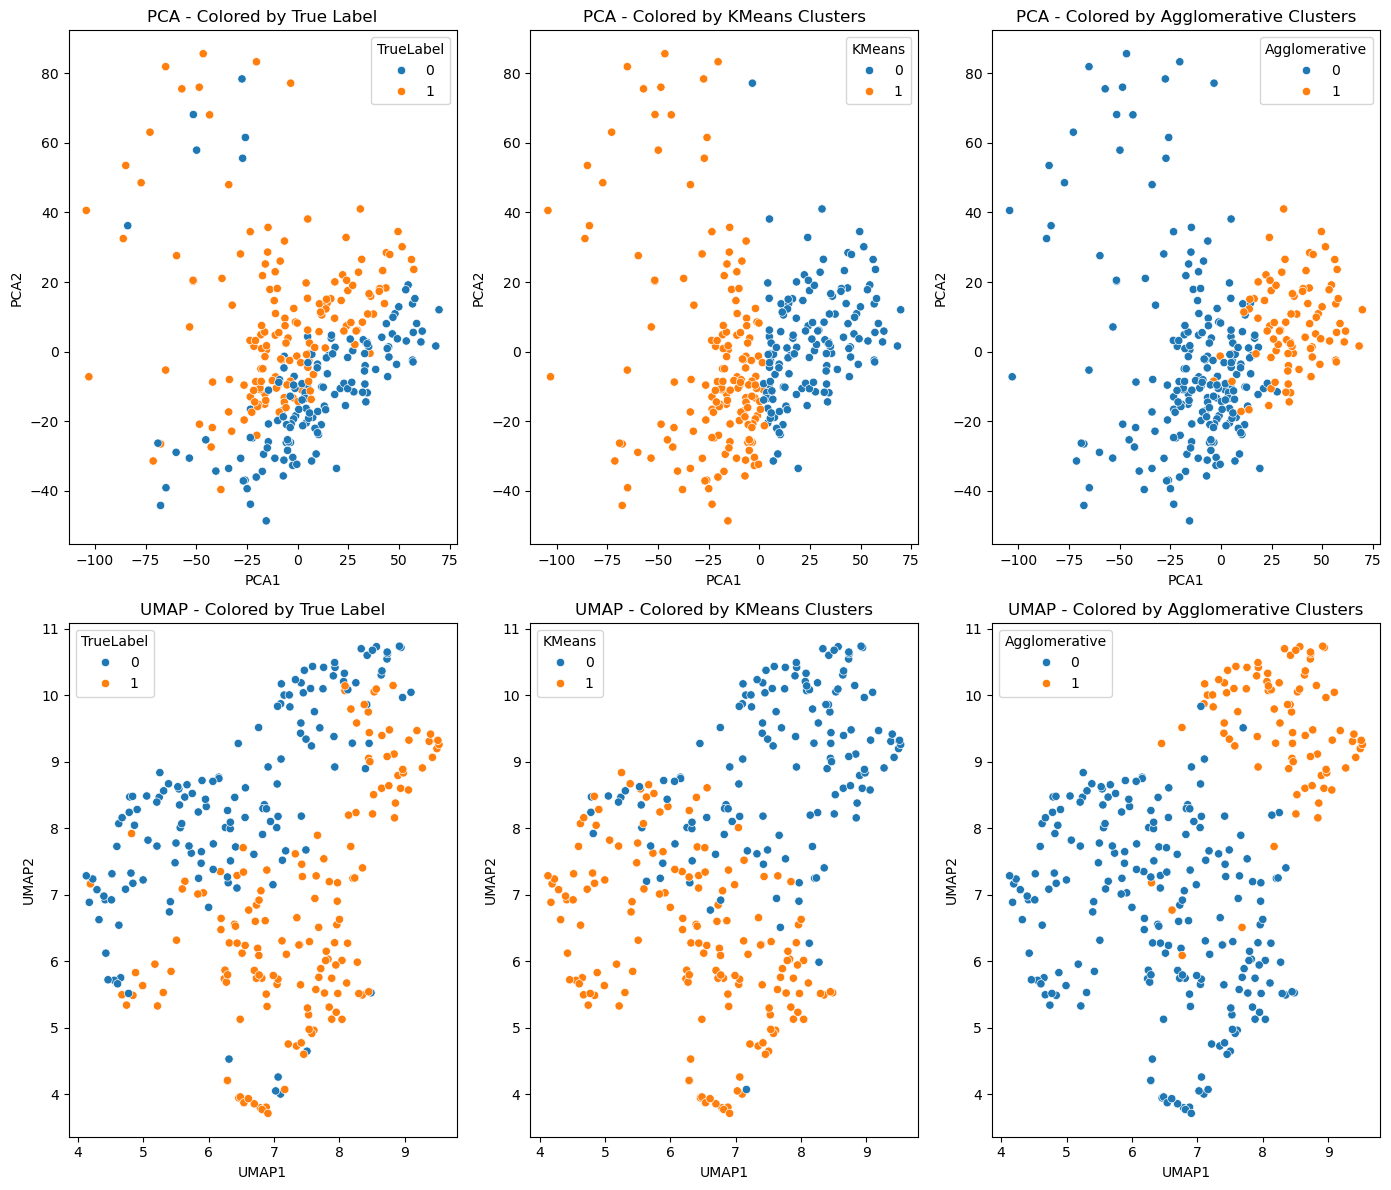

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(14, 12))

sns.scatterplot(data=results, x='PCA1', y='PCA2', hue='TrueLabel', ax=axes[0, 0])
axes[0, 0].set_title('PCA - Colored by True Label')

sns.scatterplot(data=results, x='PCA1', y='PCA2', hue='KMeans', ax=axes[0, 1])
axes[0, 1].set_title('PCA - Colored by KMeans Clusters')

sns.scatterplot(data=results, x='PCA1', y='PCA2', hue='Agglomerative', ax=axes[0, 2])
axes[0, 2].set_title('PCA - Colored by Agglomerative Clusters')


sns.scatterplot(data=results, x='UMAP1', y='UMAP2', hue='TrueLabel', ax=axes[1, 0])
axes[1, 0].set_title('UMAP - Colored by True Label')

sns.scatterplot(data=results, x='UMAP1', y='UMAP2', hue='KMeans', ax=axes[1, 1])
axes[1, 1].set_title('UMAP - Colored by KMeans Clusters')

sns.scatterplot(data=results, x='UMAP1', y='UMAP2', hue='Agglomerative', ax=axes[1, 2])
axes[1, 2].set_title('UMAP - Colored by Agglomerative Clusters')


plt.tight_layout()
plt.show()

## Feature selection

Initialize the dictionary that will contain the df_X resultant of all feature selection methods used. We set the maximum of features to be 500 (10% of the original dataset).

In [19]:
feature_reductions = {}

Minimal Variance Treshold:

* Removes low-variance features (assumes features are on the same scale).

* If features are not scaled, variance will be biased toward features with larger magnitudes.

* Needs StandardScaler before applying.

The treshold means ....., and by increasing this hyperparanter the number of features decreases.

In [20]:
variance = VarianceThreshold(threshold=1.0) 
X_filtered = variance.fit_transform(X_scaled)
selected_features_variance = df_X.columns[variance.get_support()]


if len(selected_features_variance) > 500:
    variances = np.var(X_scaled[:, variance.get_support()], axis=0)
    top_indices = np.argsort(variances)[-500:]
    selected_features_variance = selected_features_variance[top_indices]

x = df_X[selected_features_variance]
print(f"Variance Threshold selected {x.shape[1]} features (max 500)")
feature_reductions["Variance Threshold"] = x

Variance Threshold selected 500 features (max 500)


Principal Component Analysis (PCA)

In [21]:
X_scaled

array([[-1.61541726, -2.23798928, -0.00604086, ..., -1.51465683,
         0.10232217,  0.87514277],
       [ 2.07907233,  0.07910029,  2.30928791, ..., -0.93692894,
         0.79055191,  0.89346788],
       [ 0.84864836, -0.52132144,  0.89366589, ..., -1.54535885,
         0.8126301 ,  0.91159891],
       ...,
       [ 0.79486166,  0.75955381,  0.95854425, ...,  0.89171421,
         1.04858882,  0.59905307],
       [-0.25045722,  0.71322605,  2.38188082, ...,  0.11731145,
        -1.11731078, -1.0236637 ],
       [ 0.41451037,  1.24166686,  3.45546485, ...,  1.8357462 ,
         0.00751842, -0.96669954]])

In [22]:
pca = PCA(n_components=0.99, random_state=42)
X_pca = pca.fit_transform(X_scaled)

y = pd.DataFrame(X_pca, index=df_X.index, 
                columns=[f"PC_{i+1}" for i in range(pca.n_components_)])
print(f"PCA kept {y.shape[1]} components")
feature_reductions["PCA"] = y

PCA kept 265 components


ANOVA F-test

* Measures the relationship between each feature and the target variable (categorical).

* Based on variance ratios, not absolute values.

* Does not need StandardScaler.

In [23]:
k = min(500, df_X.shape[1])
anova = SelectKBest(score_func=f_classif, k=k)
X_selected = anova.fit_transform(df_X, df_Y)
selected_features_anova = df_X.columns[anova.get_support()]
z = df_X[selected_features_anova]
print(f"ANOVA selected {z.shape[1]} features")
feature_reductions["ANOVA"] = z

ANOVA selected 500 features


c:\Users\marta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Correlation with the Target Variable

* Does not use StandardScaler

In [13]:
target_correlation = pd.concat([df_X, df_Y], axis=1).corr()[df_Y.columns[0]].abs()
target_correlation = target_correlation.drop(df_Y.columns[0]).sort_values(ascending=False)
top_n = min(500, len(target_correlation))  
selected_features_correlation = target_correlation.head(top_n).index
w = df_X[selected_features_correlation]
print(f"Correlation selected {w.shape[1]} features")
feature_reductions["Correlation"] = w

Correlation selected 500 features


In [19]:
feature_reductions["None"] = df_X

Methods applied

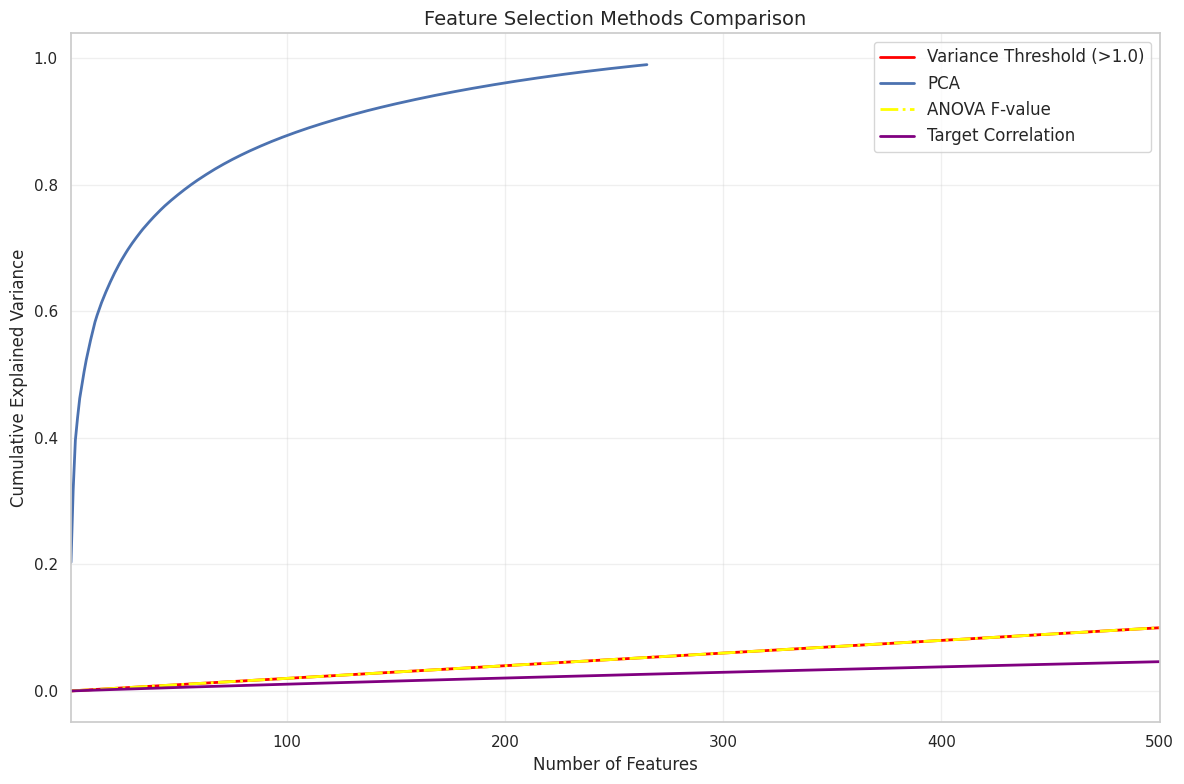

In [21]:
plt.figure(figsize=(12, 8))

# --- 1. VarianceThreshold ---
selected_variances = np.var(X_scaled[:, variance.get_support()], axis=0)
sorted_selected_variances = np.sort(selected_variances)[::-1]
cumulative_variance_selected = np.cumsum(sorted_selected_variances) / np.sum(np.var(X_scaled, axis=0))
plt.plot(range(1, len(cumulative_variance_selected)+1), 
         cumulative_variance_selected, linestyle='-',  color="red",
         label='Variance Threshold (>1.0)', linewidth=2)

# --- 2. PCA ---
pca_cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, min(501, len(pca_cumulative)+1)), 
         pca_cumulative[:500], linestyle='-',
         label='PCA', linewidth=2)

# --- 3. ANOVA ---
anova_scores = anova.scores_
sorted_indices = np.argsort(anova_scores)[::-1]
sorted_variances_anova = np.var(X_scaled, axis=0)[sorted_indices]
cumulative_variance_anova = np.cumsum(sorted_variances_anova) / np.sum(np.var(X_scaled, axis=0))
plt.plot(range(1, min(501, len(cumulative_variance_anova)+1)), 
         cumulative_variance_anova[:500], linestyle='-.', color="yellow",
         label='ANOVA F-value', linewidth=2)

# --- 4. Target Correlation ---
cumulative_variance_corr = np.cumsum(target_correlation) / np.sum(np.var(X_scaled, axis=0))
plt.plot(range(1, min(501, len(cumulative_variance_corr)+1)), 
         cumulative_variance_corr[:500], linestyle='-', color="purple",
         label='Target Correlation', linewidth=2)

# --- Final plot customization ---
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Feature Selection Methods Comparison', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.xlim(1, min(500, X_scaled.shape[1]))
plt.tight_layout()
plt.show()



Selected features by type of method

In [16]:
print(feature_reductions)

{'Variance Threshold':          NAV2      SCG2      KLK7     ATXN7     CEP63     NTSR2      THRA  \
0    2.215275  1.887834  1.730437  1.877004  1.803601  1.632311  1.794834   
1    2.100200  2.346226  1.623967  1.746630  2.090638  1.850370  1.934027   
2    1.901059  2.079891  1.845552  1.736971  1.939237  1.639980  1.787103   
3    2.210773  2.493276  1.614682  1.653307  1.948266  1.642109  1.870785   
4    2.264473  2.359501  1.625020  1.874049  1.971226  2.307697  1.979233   
..        ...       ...       ...       ...       ...       ...       ...   
297  2.281648  2.153420  1.653830  1.801379  1.991497  1.916533  1.960938   
298  2.275639  2.263439  1.630903  1.811739  2.066924  1.901442  1.951423   
299  2.258022  2.338533  1.637654  1.781990  2.058646  1.701202  2.017909   
300  2.309625  2.378268  1.681708  1.757912  2.089266  1.664303  1.940496   
301  2.089991  2.519974  1.654914  1.752212  2.073572  1.799372  1.944329   

     C6orf162   ADORA2B     TACC2  ...     SATL1    

## Model training & testing

### Supervised Learning

In [30]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Neural Network": MLPClassifier()
}

kf = StratifiedKFold(n_splits=5, shuffle=True)

warnings.filterwarnings("ignore")

#################################
# Evaluating LogisticRegression #
#################################

#################################
#    With Variance Threshold    #
#################################

Accuracy: 0.930
Precision: 0.943
Recall: 0.924
F1: 0.932



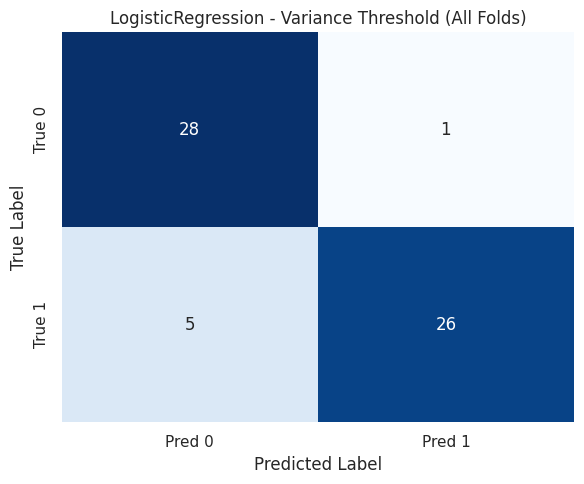

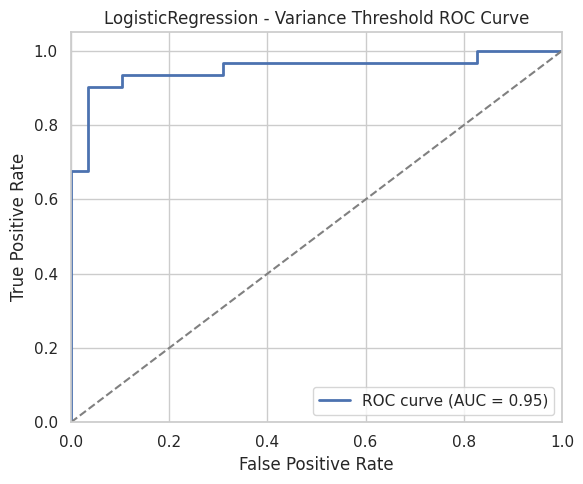


#################################
#           With PCA            #
#################################

Accuracy: 0.613
Precision: 0.632
Recall: 0.611
F1: 0.619



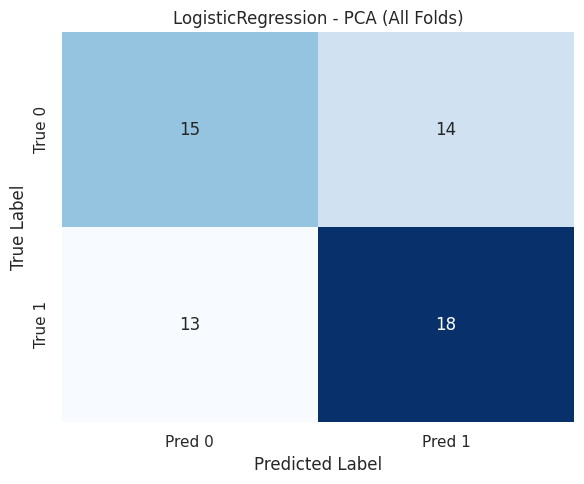

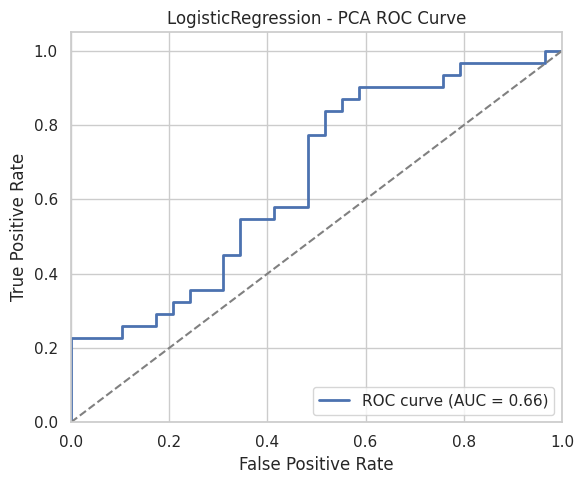


#################################
#          With ANOVA           #
#################################

Accuracy: 0.917
Precision: 0.928
Recall: 0.917
F1: 0.919



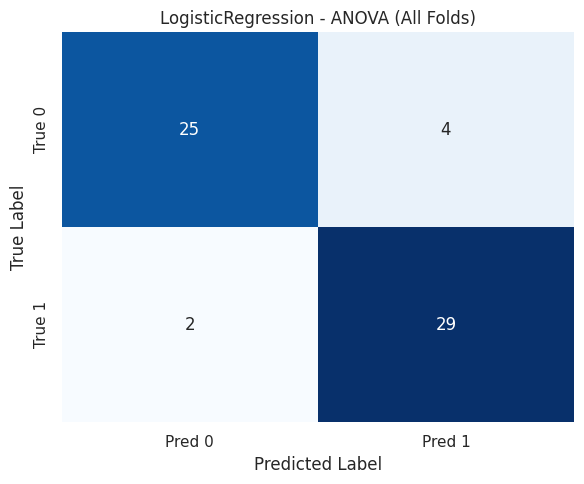

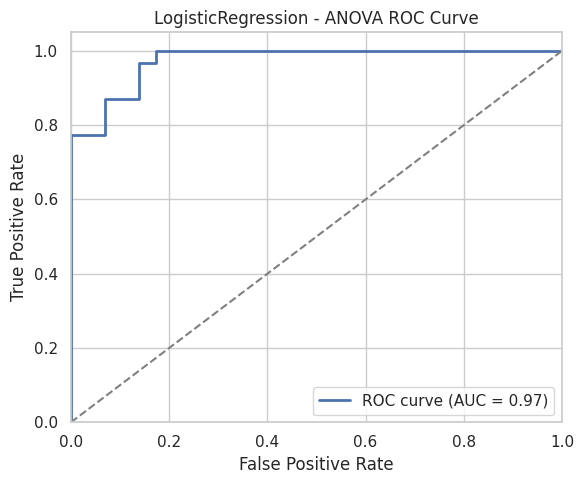


#################################
#       With Correlation        #
#################################

Accuracy: 0.914
Precision: 0.918
Recall: 0.917
F1: 0.917



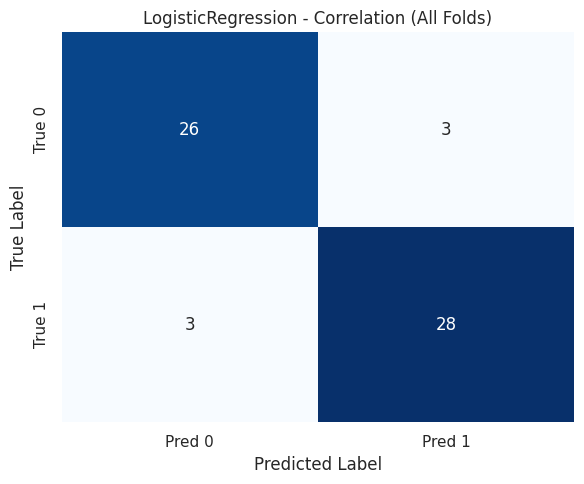

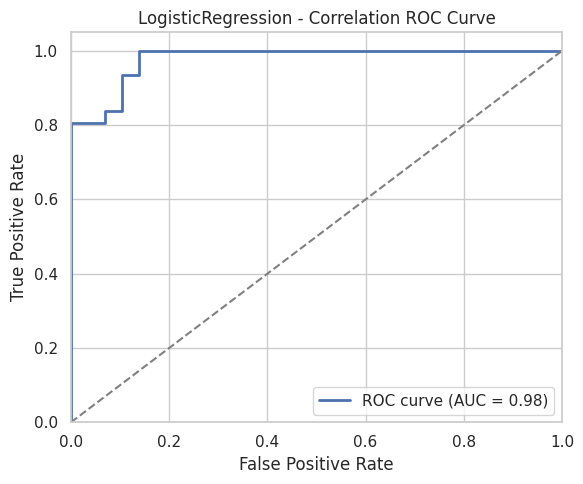


#################################
#           With None           #
#################################

Accuracy: 0.924
Precision: 0.925
Recall: 0.930
F1: 0.927



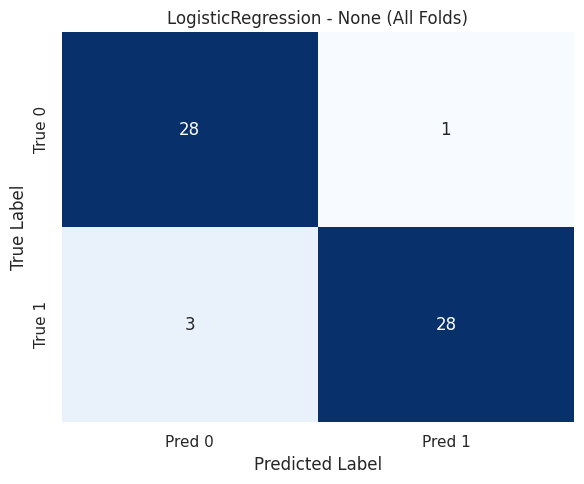

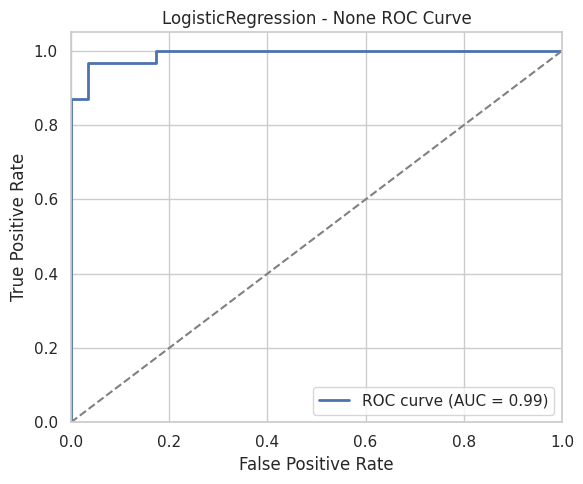


#################################
#    Evaluating RandomForest    #
#################################

#################################
#    With Variance Threshold    #
#################################

Accuracy: 0.904
Precision: 0.892
Recall: 0.930
F1: 0.910



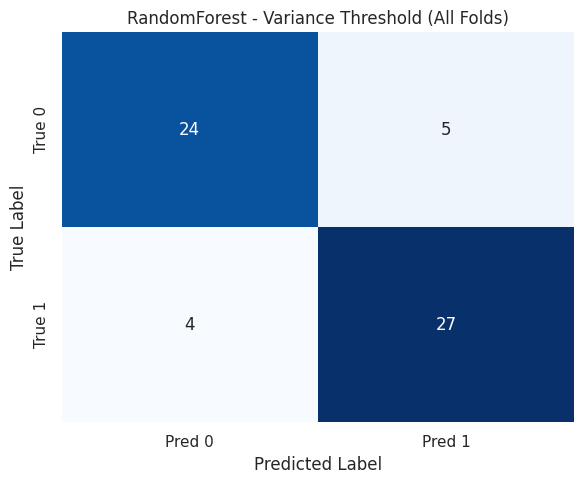

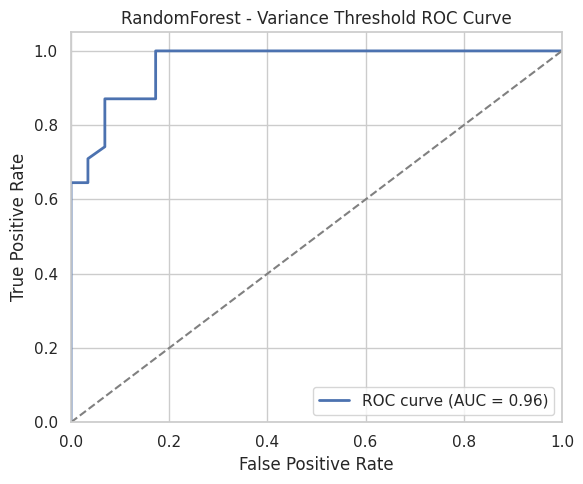


#################################
#           With PCA            #
#################################

Accuracy: 0.881
Precision: 0.876
Recall: 0.898
F1: 0.886



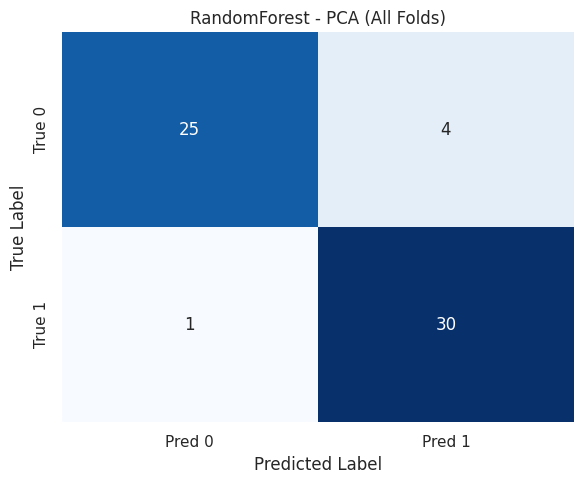

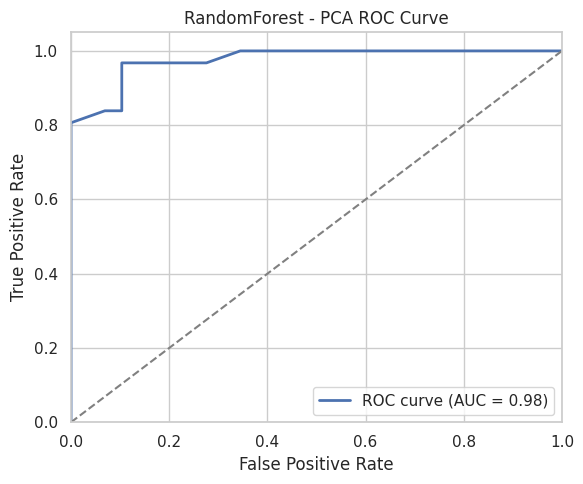


#################################
#          With ANOVA           #
#################################

Accuracy: 0.924
Precision: 0.915
Recall: 0.943
F1: 0.928



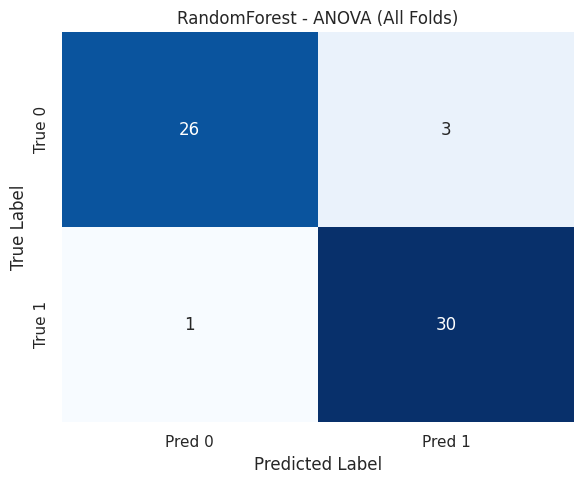

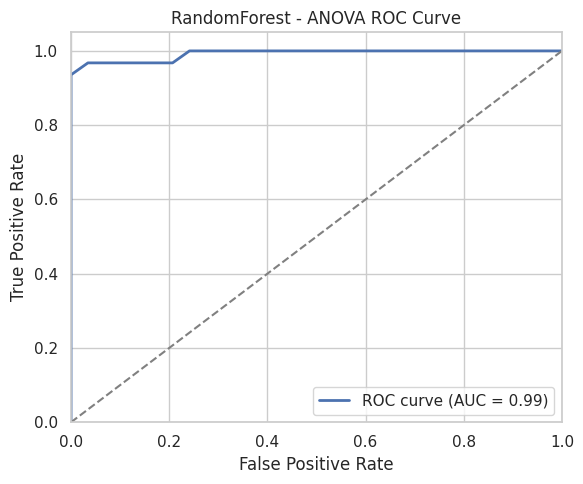


#################################
#       With Correlation        #
#################################

Accuracy: 0.937
Precision: 0.923
Recall: 0.961
F1: 0.940



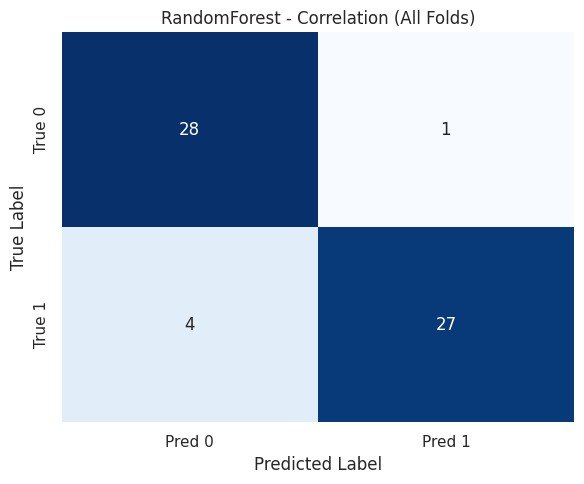

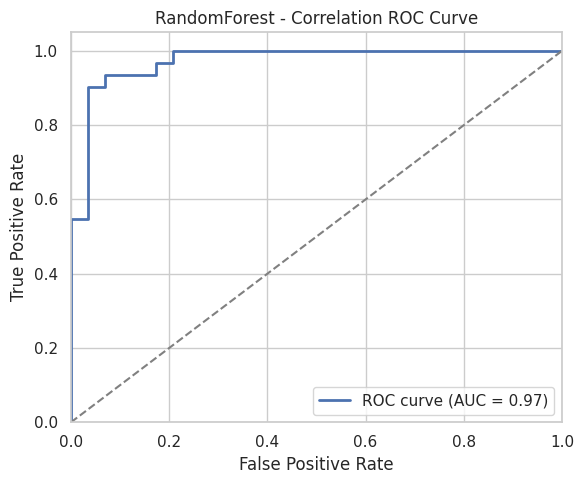


#################################
#           With None           #
#################################

Accuracy: 0.924
Precision: 0.907
Recall: 0.956
F1: 0.929



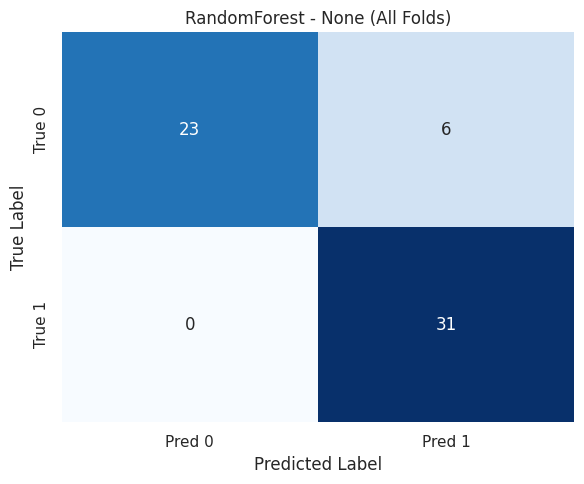

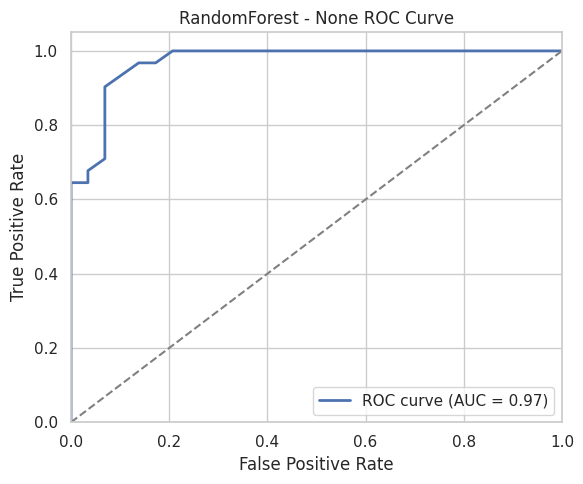


#################################
#        Evaluating QDA         #
#################################

#################################
#    With Variance Threshold    #
#################################

Accuracy: 0.523
Precision: 0.547
Recall: 0.503
F1: 0.513



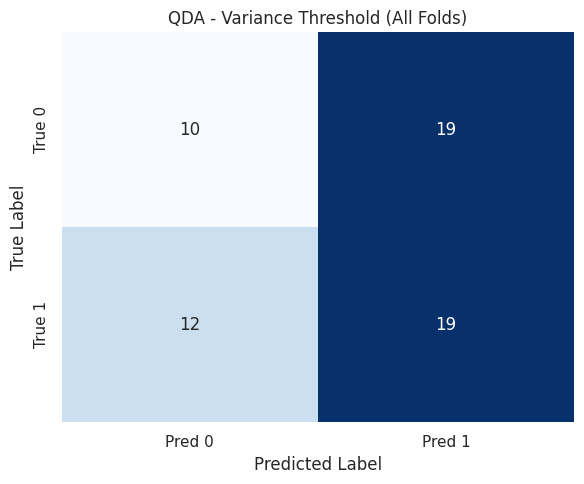

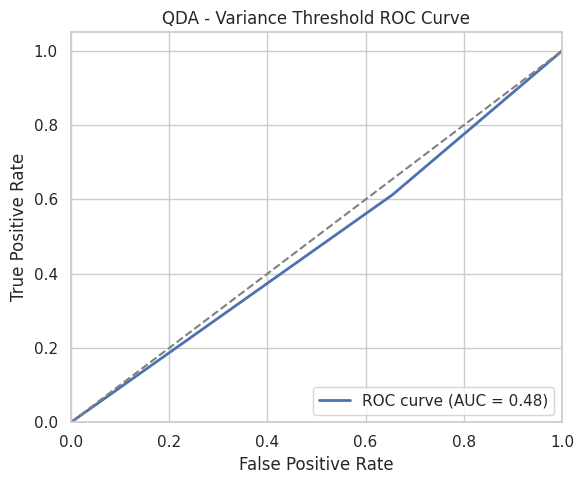


#################################
#           With PCA            #
#################################

Accuracy: 0.523
Precision: 0.547
Recall: 0.491
F1: 0.517



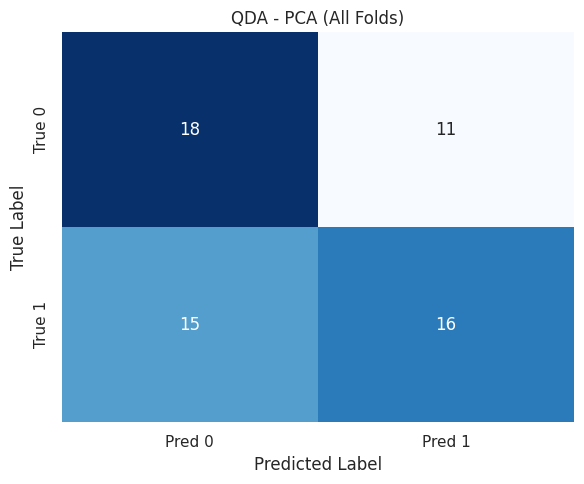

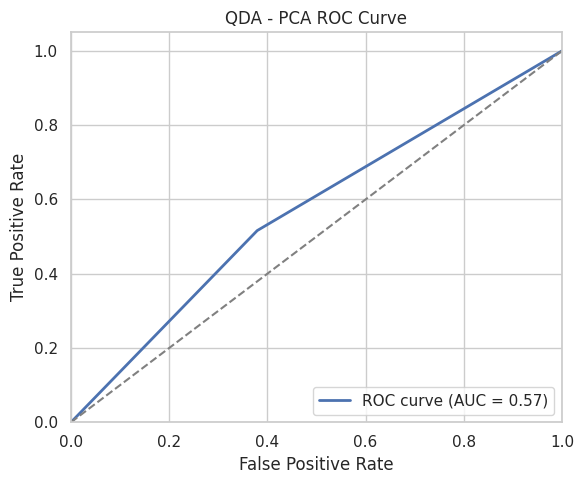


#################################
#          With ANOVA           #
#################################

Accuracy: 0.619
Precision: 0.629
Recall: 0.650
F1: 0.636



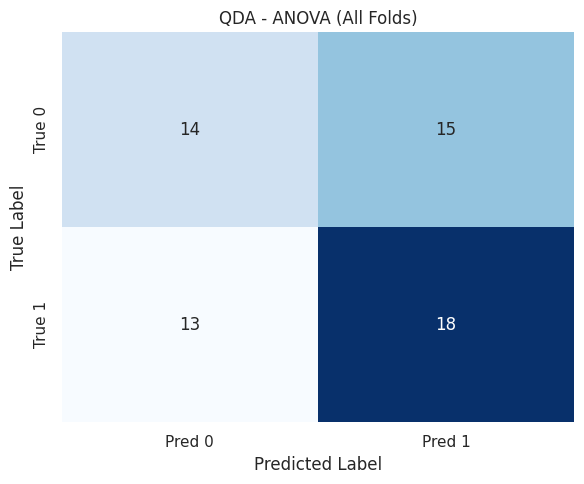

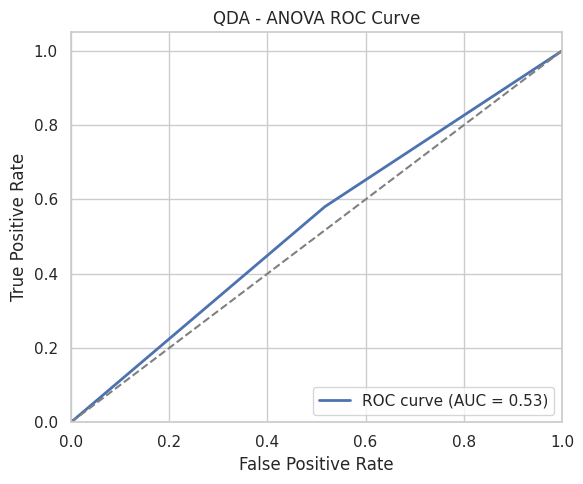


#################################
#       With Correlation        #
#################################

Accuracy: 0.500
Precision: 0.518
Recall: 0.491
F1: 0.502



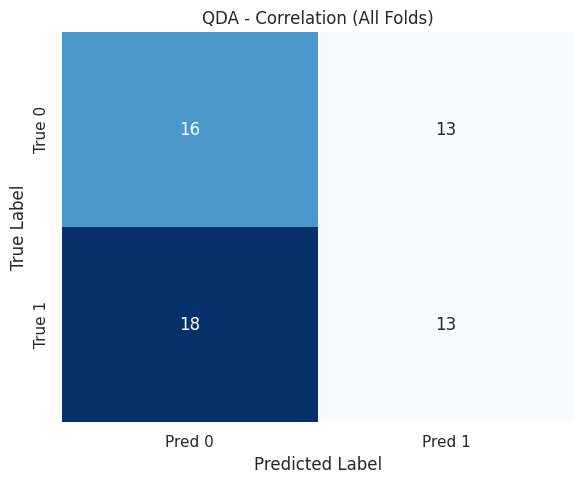

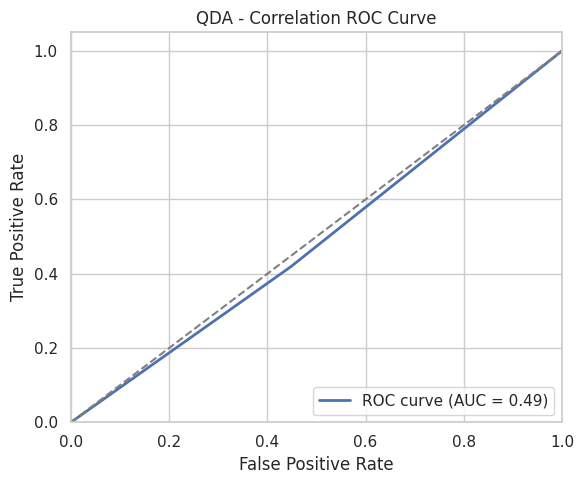


#################################
#           With None           #
#################################

Accuracy: 0.494
Precision: 0.517
Recall: 0.541
F1: 0.527



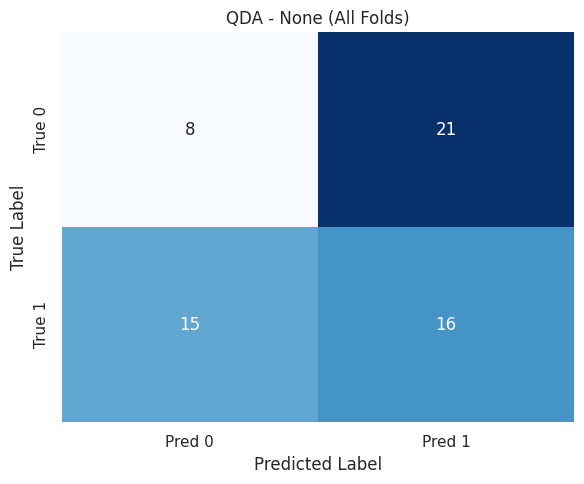

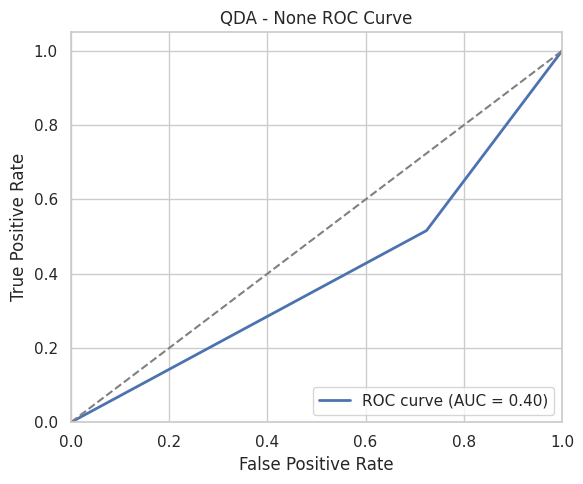


#################################
#   Evaluating Neural Network   #
#################################

#################################
#    With Variance Threshold    #
#################################

Accuracy: 0.937
Precision: 0.949
Recall: 0.930
F1: 0.939



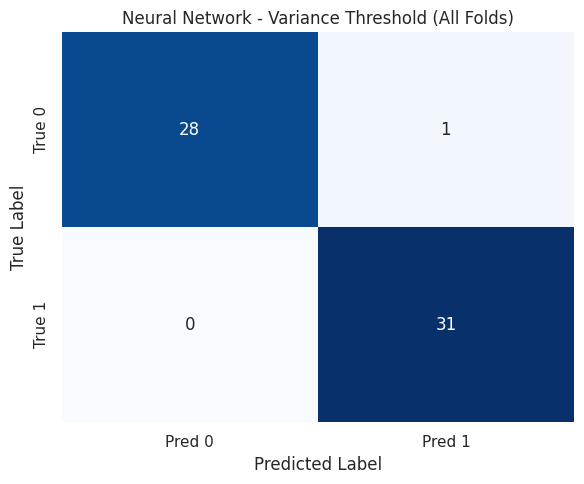

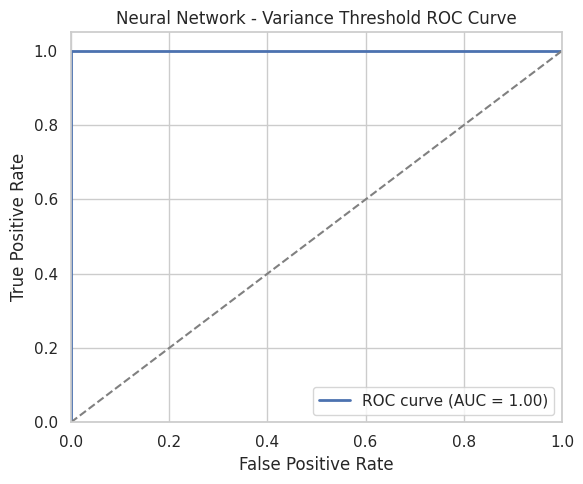


#################################
#           With PCA            #
#################################

Accuracy: 0.338
Precision: 0.353
Recall: 0.358
F1: 0.353



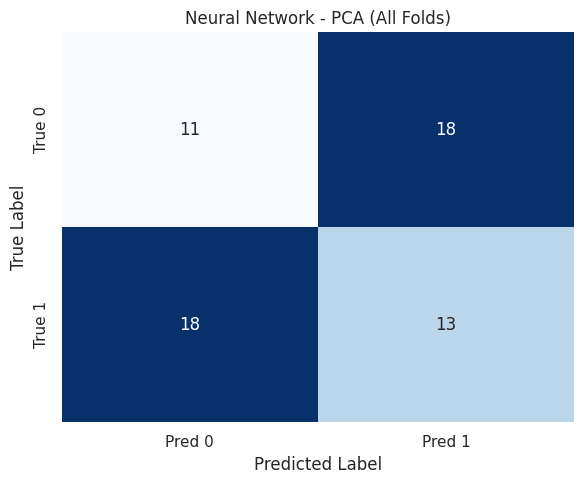

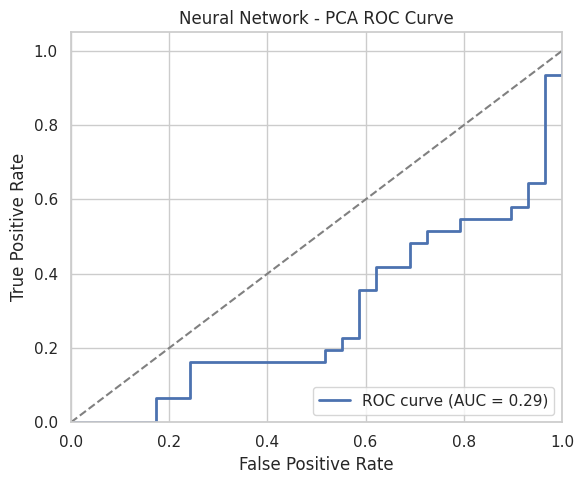


#################################
#          With ANOVA           #
#################################

Accuracy: 0.944
Precision: 0.933
Recall: 0.962
F1: 0.947



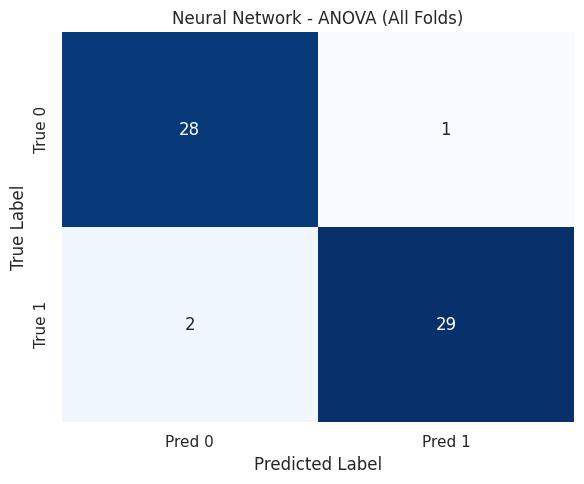

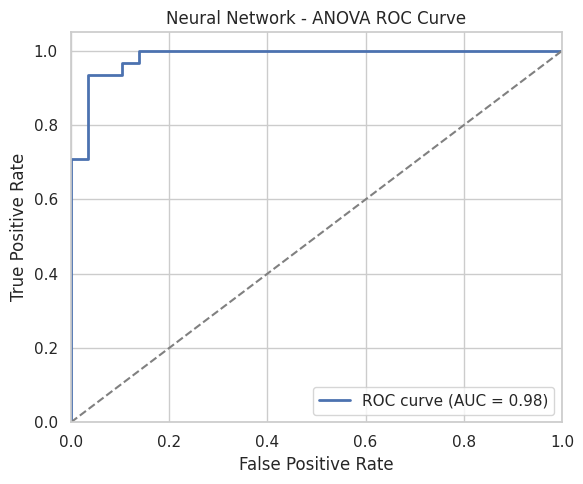


#################################
#       With Correlation        #
#################################

Accuracy: 0.950
Precision: 0.946
Recall: 0.962
F1: 0.953



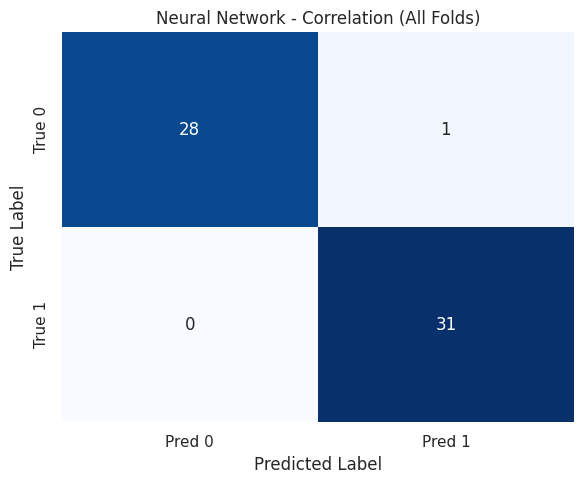

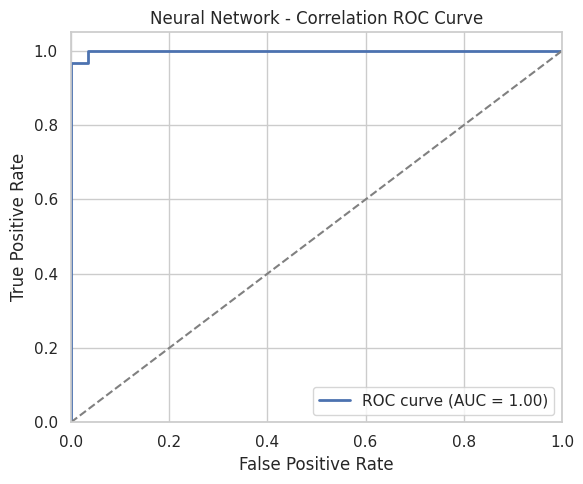


#################################
#           With None           #
#################################

Accuracy: 0.934
Precision: 0.937
Recall: 0.936
F1: 0.935



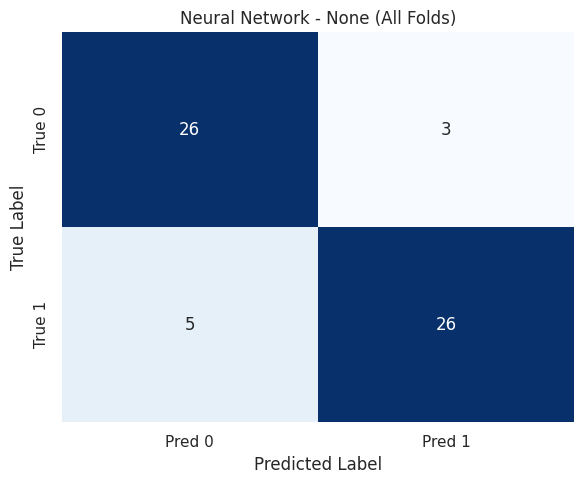

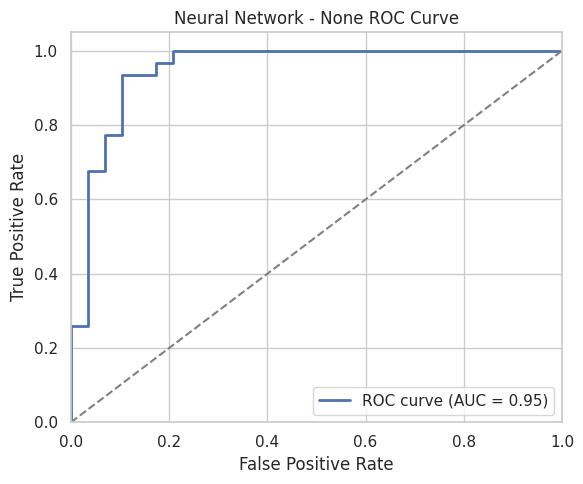

In [31]:
all_results = {}

for name, model in models.items():
    model_results = {}
    print("#################################")
    spaces_left = len("#################################")-len(f"Evaluating {name}")-2
    print("#"+ " "*(int(np.floor(spaces_left/2)))+ f"Evaluating {name}"+ " "*(int(np.ceil(spaces_left/2)))+ "#")
    print("#################################\n")

    for method_name, df in feature_reductions.items():
        print("#################################")
        spaces_left = len("#################################")-len(f"With {method_name}")-2
        print("#"+ " "*(int(np.floor(spaces_left/2)))+ f"With {method_name}"+ " "*(int(np.ceil(spaces_left/2)))+ "#")
        print("#################################\n")

        metrics = {"accuracy": [], "precision": [], "recall": [], "f1": []}

        all_y_true = []
        all_y_pred = []
        all_y_prob = []

        df = df.values
        for train_idx, test_idx in kf.split(df, df_Y):

            X_train, X_test = df[train_idx], df[test_idx]
            y_train, y_test = df_Y.iloc[train_idx], df_Y.iloc[test_idx]

            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', model)
            ])
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            y_proba = pipeline.predict_proba(X_test)[:, 1]

            metrics["accuracy"].append(accuracy_score(y_test, y_pred))
            metrics["precision"].append(precision_score(y_test, y_pred))
            metrics["recall"].append(recall_score(y_test, y_pred))
            metrics["f1"].append(f1_score(y_test, y_pred))

            all_y_prob = np.array(y_proba).flatten()
            all_y_true = np.array(y_test).flatten()
            all_y_pred = np.array(y_pred).flatten()

        model_results[method_name] = {"accuracy": np.mean(metrics["accuracy"]),
                                      "precision": np.mean(metrics["precision"]),
                                      "recall": np.mean(metrics["recall"]),
                                      "f1": np.mean(metrics["f1"])}

        print(f"Accuracy: {model_results[method_name]['accuracy']:.3f}")
        print(f"Precision: {model_results[method_name]['precision']:.3f}")
        print(f"Recall: {model_results[method_name]['recall']:.3f}")
        print(f"F1: {model_results[method_name]['f1']:.3f}\n")

        cm = confusion_matrix(all_y_true, all_y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"{name} - {method_name} (All Folds)")
        plt.tight_layout()
        plt.show()


        fpr, tpr, _ = roc_curve(all_y_true, all_y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 5))
        sns.set(style='whitegrid')
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', linewidth=2)
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"{name} - {method_name} ROC Curve")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

        print()

    all_results[name] = model_results



Print the table with all acuracies from the different methods.

In [24]:
results_table = pd.DataFrame({
    model_name: {
        method: metrics["accuracy"] 
        for method, metrics in model_metrics.items()
    }
    for model_name, model_metrics in all_results.items()
}).T 


results_table_styled = results_table.style \
    .format("{:.3f}") \
    .set_caption("Model Accuracy by Feature Selection Method") \
    .set_properties(**{'text-align': 'center'}) \
    .background_gradient(cmap='Blues', subset=pd.IndexSlice[:, :])


display(results_table_styled)

,Variance Threshold,PCA,ANOVA,Correlation,None
LogisticRegression,0.924,0.586,0.930,0.911,0.927
RandomForest,0.921,0.847,0.914,0.927,0.917
QDA,0.546,0.543,0.606,0.563,0.586
Neural Network,0.944,0.358,0.944,0.947,0.937
